In [ ]:
# First I need to categorize the data from my participants
# Trials (1-667 (might have to cut some out)), stimuli_type (Happy vs Angry), response (Approach vs Avoid),% #Congruency (congruent vs incongruent), block_type (stable vs volatile), change objectively correct to accuracy maybe and structure it as (correct vs incorrect), response_time in ms, and reward amount ( -10 or +10 cents)
# mix objectively correct and stimuli type for the Congruency condition  

#My 1st step is to create a data frame where all the participants data is stored

#Import everything 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob2
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)

# Now we load the data

In [2]:

data = pd.read_csv(
    '/Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv',
    delimiter=';')

print(data)


     trial  emotional_cue_time response objectively_correct  \
0        0        1.741364e+09       up                Even   
1        1        1.741364e+09     down                Even   
2        2        1.741364e+09      NaN                Late   
3        3        1.741364e+09       up                Even   
4        4        1.741364e+09     down                Even   
5        5        1.741364e+09     down                Even   
6        6        1.741364e+09     down                Even   
7        7        1.741364e+09       up                Even   
8        8        1.741364e+09     down                True   
9        9        1.741364e+09     down                True   
10      10        1.741364e+09       up                True   
11      11        1.741364e+09       up                True   
12      12        1.741364e+09     down                True   
13      13        1.741364e+09       up                True   
14      14        1.741364e+09       up                

# Now I wish to automatize my data frame = concatenate

In [3]:
# Define the base folder and selected subjects
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

# Loop through each subject folder and process `ses-mri01` for now
for subject in selected_subjects:
    # Only focus on `ses-mri01` for now
    session = "ses-mri01"
    beh_folder = os.path.join(base_folder, subject, session, "beh")

    # Ensure the directory exists
    if not os.path.isdir(beh_folder):
        print(f"❌ Directory does not exist: {beh_folder}")
        continue

    # List all CSV files in the folder, but only process 'behavioural_output' files
    csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

    # If no relevant files are found, skip this subject
    if not csv_files:
        print(f"⚠️ No relevant behavioural CSV files found for {subject} in {session}")
        continue

    # Loop through the relevant CSV files
    for file in csv_files:
        print(f"📂 Reading {file}...")

        try:
            # Read the file with the correct delimiter
            df = pd.read_csv(file, delimiter=';', encoding='utf-8')

            # Check the first few rows to ensure the data is correct
            print(f"📊 Data from {file}:")
            print(df.head())  # Print first few rows to ensure data is being read correctly

            # Drop unwanted columns
            cols_to_drop = ["datapoint", "location_y", "timepoints", "timepoint"]
            df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

            # Remove empty columns
            df = df.dropna(how="all", axis=1)

            # Add subject ID and session columns
            df["subject"] = subject
            df["session"] = session  # Add the session column here

            # Print the cleaned data to verify
            print(f"After cleaning data from {file}:")
            print(df.head())  # Check if data is non-empty

            all_data.append(df)

        except Exception as e:
            print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Check if combined_df is empty before saving
    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Combined data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")



📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📊 Data from /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv:
   trial  emotional_cue_time response objectively_correct  \
0      0        1.741364e+09       up                Even   
1      1        1.741364e+09     down                Even   
2      2        1.741364e+09      NaN                Late   
3      3        1.741364e+09       up                Even   
4      4        1.741364e+09     down                Even   

  subjectively_correct  response_time   RT_s  feedback_time  stimuli_type  \
0                False   1.741364e+09  1.091   1.741364e+09             1   
1                False   1.741364e+09  0.597   1.741364e+09             1   
2                 Late   1.741364e+09  1.213   1.741364e+09             1   
3                False   1.741364e+09  1.094   1.741364

# Now I need to categorize my data: 


In [4]:
#I have also started to think on how to categorize the data and then what to do with it. I was thinking on something like trials (1-667 (might have to cut some out)), stimuli_type (Happy vs Angry), response (Approach vs Avoid), Congruency (congruent vs incongruent), block_type (stable vs volatile), change objectively correct to accuracy maybe and structure it as (correct vs incorrect), response_time in ms, and reward amount ( -10 or +10 cents)
#Mix objectively correct and stimuli type to create congruency 
#After talking with kenneth changes must be made here 
#There is a very small block right after the two stable blocks that should be considered stable instead of volatile as participants have no idea what’s going on there-> only very first time they experience a volatile block not for the rest of the volatile periods 
# Same happens after 6-8-10 trials when they restart a stable block-> label it as volatile 
# Look into 80-20 and fix up that column; you have to filter out 50 (corresponds to 9 first trials) as that is only the very beginning of the trials-80/20 determine reward and how participant should act (joystick action)

#I should organise my data by subject_id, trial, stimuli_type and probability conditions then I could add switch and volatility
# stimuli_type and probability_condition are intertiwned to calculate switch; we are looking at within comparisons of categories so we need to take both into account, this is also why the order is relevant

📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-011/ses-mri01/beh/behavioural_output_sub-011_session-01_dummy_2025-03-19_16-39-58.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-013/ses-mri01/beh/behavioural_output_sub-013_session-01_dummy_2025-03-20_13-19-45.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-014/ses-mri01/beh/behavioural_output_sub-014_session-01_dummy_2025-03-21_10-45-03.csv...
✅ Categorized data saved to /Users/carlacoca/Documents/master_internship/outputs_final_data/categorized_df.csv


# Let's do a couple graphs to test our data frame 

In [21]:
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014", "sub-016"]

all_data = []

for subject in selected_subjects:
    subject_folder = os.path.join(base_folder, subject)
    session_dirs = sorted([d for d in os.listdir(subject_folder) if d.startswith("ses-")])

    for session in session_dirs:
        beh_folder = os.path.join(subject_folder, session, "beh")

        if not os.path.isdir(beh_folder):
            print(f"❌ Directory does not exist: {beh_folder}")
            continue

        csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

        if not csv_files:
            print(f"⚠️ No behavioural CSV files found for {subject} in {session}")
            continue

        for file in csv_files:
            print(f"📂 Reading {file}...")
            try:
                df = pd.read_csv(file, delimiter=";", encoding="utf-8")
                #drop unwanted columns
                cols_to_drop = ["emotional_cue_time", "subjectively_correct", "feedback_time", "face_type", "response_time", "stimuli_name", "congruency"]
                df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")
  
            # Remove empty columns
                df = df.dropna(how="all", axis=1)

                # Add subject ID and session columns
                df["subject"] = subject
                df["session"] = session
    
                df = df.sort_values(['subject', 'session', 'stimuli_type', 'trial'])
    
                # --- CATEGORIZE DATA --- #
    
                # Ensure trial column exists before filtering
                if "trial" in df.columns:
                    df = df[df["trial"].between(1, 667)]
    
                # Categorize stimuli type
                df["stimuli_type"] = df["stimuli_type"].map({1: "Angry", 2: "Happy"})
    
                # Remove rows with probability_condition == 50
                df = df[df["probability_condition"] != 50]
    
                # Categorize response as Approach vs. Avoid (fixed mapping)
                df["response"] = df["response"].map({"up": "Avoid", "down": "Approach"})
    
                # Ensure reward amount is numeric
                df["reward_amount"] = pd.to_numeric(df["reward_amount"], errors="coerce")
    
                # Calculate change in reward amount per trial
                df["reward_change"] = df["reward_amount"].diff().round(2)  # Round to 2 decimal places
                df["reward_display"] = df["reward_change"].map({0.10: "+10 cents", -0.10: "-10 cents"}).fillna("unknown")
    
                # Define congruency based on stimuli type and response
                df["congruency_response"] = "incongruent"  # Default
                df.loc[
                    (df["stimuli_type"] == "Happy") & (df["response"] == "Approach"), "congruency_response"] = "congruent"
                df.loc[(df["stimuli_type"] == "Angry") & (df["response"] == "Avoid"), "congruency_response"] = "congruent"
    
                # WE WANT To see congruency_condition where we look at the underlying probability condition; the condition that gives the highest chance of giving a reward 
                df['task_congruency'] = np.where(df['response'] ==
                                                 df['objectively_correct'], 'congruent', 'incongruent')
    
               # Step 1: Identify switches only within the same stimuli type (avoid Angry↔Happy counting as switches)
                df['switch'] = df.groupby(['subject', 'session', 'stimuli_type'])['probability_condition'].transform(lambda x: x != x.shift(1)).astype(int)
                
                # Set the first trial in each subject/session/stimuli_type to not be a switch
                first_idx = df.groupby(['subject', 'session', 'stimuli_type']).head(1).index
                df.loc[first_idx, 'switch'] = 0
                
                # Step 2: Assign cumulative switch groups within each subject/session/stimuli_type
                df['switch_group'] = df.groupby(['subject', 'session', 'stimuli_type'])['switch'].cumsum()
                
                # Step 3: Time since switch
                df['time_since_switch'] = df.groupby(['subject', 'session', 'stimuli_type', 'switch_group']).cumcount()
                
                # Step 4: Block size
                df['block_size'] = df.groupby(['subject', 'session', 'stimuli_type', 'switch_group'])['trial'].transform('count')
                
                # Step 5: Volatility logic
                true_block_types = (['stable'] * 2 + ['volatile'] * 6) * 3  # up to 24 blocks
                
                def assign_volatility(sub_df):
                    unique_groups = sub_df['switch_group'].unique()
                    block_map = dict(zip(sorted(unique_groups), true_block_types[:len(unique_groups)]))
                    perceived = []
                    for i, row in sub_df.iterrows():
                        group = row['switch_group']
                        tss = row['time_since_switch']
                        if group == unique_groups[0]:
                            p_vol = 'volatile' if tss < 10 else block_map[group]
                        else:
                            prev_group = unique_groups[list(unique_groups).index(group) - 1]
                            prev_vol = block_map[prev_group]
                            p_vol = prev_vol if tss < 10 else block_map[group]
                        perceived.append(p_vol)
                    return pd.Series(perceived, index=sub_df.index)
                
                df['volatility'] = (df.groupby(['subject', 'session', 'stimuli_type'], group_keys=False, observed=True).apply(assign_volatility, include_groups=False)
                                    )
    
                all_data.append(df)

            except Exception as e:
                print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        # Reorder and sort
        preferred_order = ["subject", "session", "stimuli_type", "trial", "probability_condition", "switch",
                           "time_since_switch", "volatility"]
        other_columns = [col for col in combined_df.columns if col not in preferred_order]
        combined_df = combined_df[preferred_order + other_columns]

        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Categorized data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")

📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri02/beh/behavioural_output_sub-005_session-02_skyra_2025-03-14_11-00-23.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri03/beh/behavioural_output_sub-005_session-03_skyra_2025-03-21_15-48-02.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri04/beh/behavioural_output_sub-005_session-04_skyra_2025-03-28_15-50-17.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri02/beh/behavioural_output_sub-010_session-02_skyra_2025-03-13_11-21-05.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri03/beh/behavioural_output_sub-010_session-03_skyra_2025-03-19_11-41-24.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-m

In [23]:
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

for subject in selected_subjects:
    subject_folder = os.path.join(base_folder, subject)
    session_dirs = sorted([d for d in os.listdir(subject_folder) if d.startswith("ses-")])

    for session in session_dirs:
        beh_folder = os.path.join(subject_folder, session, "beh")

        if not os.path.isdir(beh_folder):
            print(f"❌ Directory does not exist: {beh_folder}")
            continue

        csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

        if not csv_files:
            print(f"⚠️ No behavioural CSV files found for {subject} in {session}")
            continue

        for file in csv_files:
            print(f"📂 Reading {file}...")
            try:
                df = pd.read_csv(file, delimiter=";", encoding="utf-8")
                #drop unwanted columns
                cols_to_drop = ["emotional_cue_time", "subjectively_correct", "feedback_time", "face_type", "response_time", "stimuli_name", "congruency"]
                df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")
  
            # Remove empty columns
                df = df.dropna(how="all", axis=1)

                # Add subject ID and session columns
                df["subject"] = subject
                df["session"] = session
    
                df = df.sort_values(['subject', 'session', 'stimuli_type', 'trial'])
    
                # --- CATEGORIZE DATA --- #
    
                # Ensure trial column exists before filtering
                if "trial" in df.columns:
                    df = df[df["trial"].between(1, 667)]
    
                # Categorize stimuli type
                df["stimuli_type"] = df["stimuli_type"].map({1: "Angry", 2: "Happy"})
    
                # Remove rows with probability_condition == 50
                df = df[df["probability_condition"] != 50]
    
                # Categorize response as Approach vs. Avoid (fixed mapping)
                df["response"] = df["response"].map({"up": "Avoid", "down": "Approach"})
    
                # Ensure reward amount is numeric
                df["reward_amount"] = pd.to_numeric(df["reward_amount"], errors="coerce")
    
                # Calculate change in reward amount per trial
                df["reward_change"] = df["reward_amount"].diff().round(2)  # Round to 2 decimal places
                df["reward_display"] = df["reward_change"].map({0.10: "+10 cents", -0.10: "-10 cents"}).fillna("unknown")
    
                # Define congruency based on stimuli type and response
                df["congruency_response"] = "incongruent"  # Default
                df.loc[
                    (df["stimuli_type"] == "Happy") & (df["response"] == "Approach"), "congruency_response"] = "congruent"
                df.loc[(df["stimuli_type"] == "Angry") & (df["response"] == "Avoid"), "congruency_response"] = "congruent"
    
                # WE WANT To see congruency_condition where we look at the underlying probability condition; the condition that gives the highest chance of giving a reward 
                df['task_congruency'] = np.where(df['response'] ==
                                                 df['objectively_correct'], 'congruent', 'incongruent')
    
               # Step 1: Identify switches only within the same stimuli type (avoid Angry↔Happy counting as switches)
                df['switch'] = df.groupby(['subject', 'session', 'stimuli_type'])['probability_condition'].transform(lambda x: x != x.shift(1)).astype(int)
                
                # Set the first trial in each subject/session/stimuli_type to not be a switch
                first_idx = df.groupby(['subject', 'session', 'stimuli_type']).head(1).index
                df.loc[first_idx, 'switch'] = 0
                
                # Step 2: Assign cumulative switch groups within each subject/session/stimuli_type
                df['switch_group'] = df.groupby(['subject', 'session', 'stimuli_type'])['switch'].cumsum()
                
                # Step 3: Time since switch
                df['time_since_switch'] = df.groupby(['subject', 'session', 'stimuli_type', 'switch_group']).cumcount()
                
                # Step 4: Block size
                df['block_size'] = df.groupby(['subject', 'session', 'stimuli_type', 'switch_group'])['trial'].transform('count')
                
                # Step 5: Volatility logic
                # Your default block structure
                default_block_types = (['stable'] * 2 + ['volatile'] * 6) * 3  # 24 blocks
                
                def assign_volatility(sub_df):
                    sub_df = sub_df.copy()
                    
                    # Get unique switch groups in order
                    unique_groups = sub_df['switch_group'].unique()
                
                    # Compute average trial count for first 2 blocks
                    block_sizes = sub_df.groupby('switch_group')['trial'].count()
                    first_two_sizes = block_sizes.iloc[:2]
                
                    # Heuristic: if first block is larger, assume it’s volatile
                    if first_two_sizes.iloc[0] > first_two_sizes.iloc[1]:
                        starts_with = 'volatile'
                        pattern = ['volatile'] * 6 + ['stable'] * 2
                    else:
                        starts_with = 'stable'
                        pattern = ['stable'] * 2 + ['volatile'] * 6
                
                    # Alternate the pattern every 8 blocks
                    full_pattern = []
                    toggle = 0
                    while len(full_pattern) < len(unique_groups):
                        full_pattern.extend(pattern if toggle % 2 == 0 else pattern[::-1])
                        toggle += 1
                
                    block_map = dict(zip(unique_groups, full_pattern[:len(unique_groups)]))
                    
                    # Assign volatility by matching block group
                    return sub_df['switch_group'].map(block_map)


    
                all_data.append(df)

            except Exception as e:
                print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        # Reorder and sort
        preferred_order = ["subject", "session", "stimuli_type", "trial", "probability_condition", "switch",
                           "time_since_switch", "volatility"]
        other_columns = [col for col in combined_df.columns if col not in preferred_order]
        combined_df = combined_df[preferred_order + other_columns]

        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Categorized data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")

📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri02/beh/behavioural_output_sub-005_session-02_skyra_2025-03-14_11-00-23.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri03/beh/behavioural_output_sub-005_session-03_skyra_2025-03-21_15-48-02.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri04/beh/behavioural_output_sub-005_session-04_skyra_2025-03-28_15-50-17.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri02/beh/behavioural_output_sub-010_session-02_skyra_2025-03-13_11-21-05.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri03/beh/behavioural_output_sub-010_session-03_skyra_2025-03-19_11-41-24.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-m

KeyError: "['volatility'] not in index"

In [30]:
# Load your saved data
final_df = pd.read_csv("/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv", sep=";")

print(final_df.shape)
print(final_df[['subject', 'task_congruency', 'objectively_correct']].dropna().groupby('subject').size())







(3300, 19)
subject
sub-005    660
sub-010    660
sub-011    660
sub-013    660
sub-014    660
dtype: int64


In [31]:
final_df['task_congruency'] = final_df['task_congruency'].astype(str)
final_df['subject'] = final_df['subject'].astype(str)

# Filter for non-null, valid data
df_clean = final_df.dropna(subset=['subject', 'task_congruency', 'objectively_correct'])

print("✅ Subjects after cleaning:", df_clean['subject'].unique())
print("✅ Shape after cleaning:", df_clean.shape)



✅ Subjects after cleaning: ['sub-005' 'sub-010' 'sub-011' 'sub-013' 'sub-014']
✅ Shape after cleaning: (3300, 19)


In [34]:
# Fix the data type of 'objectively_correct'
df_clean['objectively_correct'] = df_clean['objectively_correct'].map({'True': 1, 'False': 0})

# Sanity check (optional)
print(df_clean['objectively_correct'].unique())



[ 1.  0. nan]


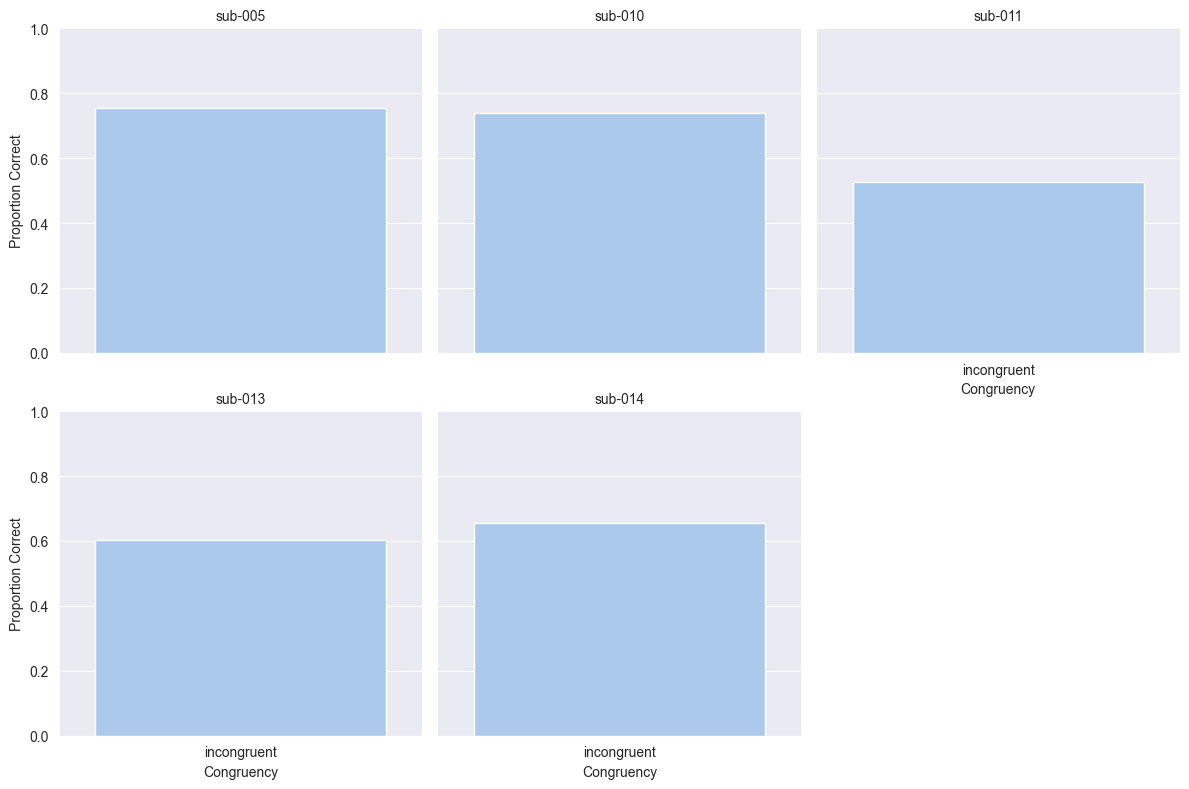

In [35]:
summary = df_clean.groupby(['subject', 'task_congruency'])['objectively_correct'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(summary, col='subject', col_wrap=3, height=4, sharey=True)
g.map_dataframe(
    sns.barplot,
    x='task_congruency',
    y='objectively_correct',
    hue='task_congruency',
    palette='pastel',
    legend=False
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Congruency", "Proportion Correct")

for ax in g.axes.flatten():
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

